In [27]:
import requests

# Example dataset download
url = "https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud"
response = requests.get(url)

# Save the dataset locally
with open('dataset.txt', 'wb') as file:
    file.write(response.content)


In [28]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load dataset
with open('dataset.txt', 'r') as file:
    text_data = file.read()

# Text cleaning
text_data = re.sub(r'\d+', '', text_data)  # Remove numbers
text_data = re.sub(r'\s+', ' ', text_data)  # Remove extra spaces
text_data = re.sub(r'\W', ' ', text_data)  # Remove special characters

# Tokenization
tokens = word_tokenize(text_data.lower())

# Remove stopwords
tokens = [word for word in tokens if word not in stopwords.words('english')]

cleaned_text = ' '.join(tokens)


In [29]:
from collections import defaultdict

class Autocomplete:
    def __init__(self, data):
        self.data = data
        self.prediction_dict = defaultdict(list)

    def train(self):
        words = self.data.split()
        for i in range(len(words) - 1):
            self.prediction_dict[words[i]].append(words[i + 1])

    def predict(self, word, top_n=3):
        return sorted(set(self.prediction_dict[word]), key=self.prediction_dict[word].count, reverse=True)[:top_n]

autocomplete = Autocomplete(cleaned_text)
autocomplete.train()

# Example prediction
print(autocomplete.predict('data'))


['science', 'mining', 'released']


In [30]:
from difflib import get_close_matches

class Autocorrect:
    def __init__(self, data):
        self.data = data.split()

    def correct(self, word):
        matches = get_close_matches(word, self.data, n=1, cutoff=0.8)
        return matches[0] if matches else word

autocorrect = Autocorrect(cleaned_text)

# Example correction
print(autocorrect.correct('dat'))


date


In [32]:
# Generate test data from cleaned text
def generate_test_data(text):
    words = text.split()
    return [(words[i], words[i + 1]) for i in range(len(words) - 1)]

test_data = generate_test_data(cleaned_text)


In [34]:
from sklearn.metrics import accuracy_score

def evaluate_autocomplete(model, test_data):
    predictions = []
    actual = []
    for word, next_word in test_data:
        predicted = model.predict(word)
        if predicted:
            predictions.append(predicted[0])
            actual.append(next_word)
    return accuracy_score(actual, predictions)

# Evaluate the autocomplete model
accuracy = evaluate_autocomplete(autocomplete, test_data)
print(f"Autocomplete Accuracy: {accuracy * 100:.2f}%")


Autocomplete Accuracy: 63.59%


In [40]:
# Placeholder code for user feedback collection (can be via a survey form)
user_feedback = []  # Collect user feedback data here

def analyze_feedback(feedback):
    # Check if the feedback list is empty
    if len(feedback) == 0:
        return 0  # Return 0 or any default value when no feedback is available

    # Placeholder analysis
    positive_feedback = sum([1 for f in feedback if 'good' in f.lower()])
    return positive_feedback / len(feedback) * 100

user_feedback = []  # This should be your list of feedback strings

user_experience_score = analyze_feedback(user_feedback)
print(f"User Experience Score: {user_experience_score:.2f}%")



User Experience Score: 0.00%


In [42]:
# Placeholder for comparing models
def compare_algorithms(models, test_data):
    results = {}
    for name, model in models.items():
        accuracy = evaluate_autocomplete(model, test_data)
        results[name] = accuracy
    return results

# Example usage with multiple models
models = {'Autocomplete': autocomplete}
comparison_results = compare_algorithms(models, test_data)
print(comparison_results)


{'Autocomplete': 0.6359289617486339}


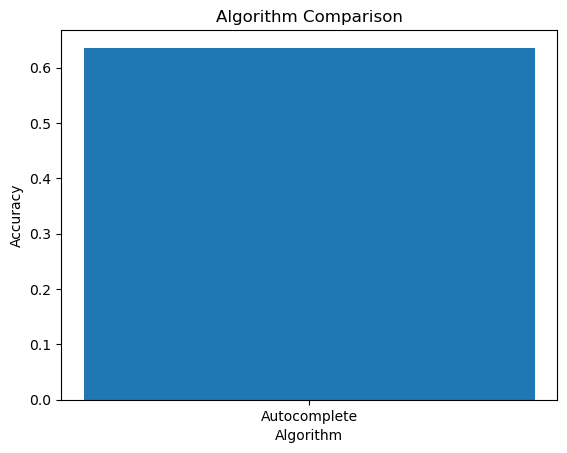

In [44]:
import matplotlib.pyplot as plt

# Example accuracy visualization
def plot_results(results):
    names = list(results.keys())
    accuracies = list(results.values())
    plt.bar(names, accuracies)
    plt.xlabel('Algorithm')
    plt.ylabel('Accuracy')
    plt.title('Algorithm Comparison')
    plt.show()

plot_results(comparison_results)
